In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sys, os
scr_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(scr_dir)

from loader.load import TimeSeriesLoader
import warnings
warnings.filterwarnings('ignore')

import importlib
import preprocessing.preprocess_pytorch
from preprocessing.preprocess_pytorch import (
    create_rolling_ts, 
    split_data,
    flatten
)

## Import data from archive

In [2]:
ROOT_PATH = 'C://Users/gilbe/Documents/aifi-bootcamp'
df = pd.read_csv(f'{ROOT_PATH}/data/aapl.csv')
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('Date', inplace=True)
# df.rename(columns={'Unnamed: 0', 'Date'}, inplace=True)
df.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2022-01-24 04:05:00,162.0632,162.9520,162.0632,162.6025,10936.0
2022-01-24 04:10:00,162.7423,162.9620,162.6225,162.9620,7705.0
2022-01-24 04:15:00,162.7922,162.7922,162.5925,162.7623,7305.0
2022-01-24 04:20:00,162.6924,162.7223,162.3928,162.4627,9290.0
2022-01-24 04:25:00,162.3129,162.4826,162.2729,162.4327,6117.0


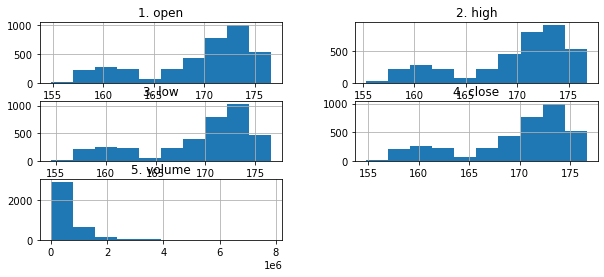

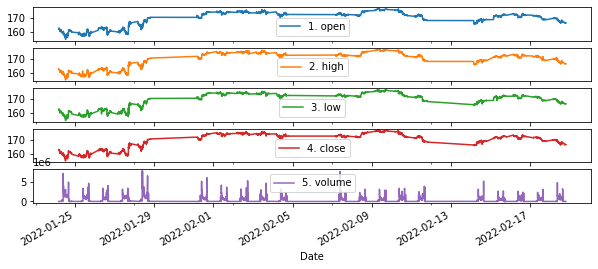

In [3]:
df.hist(figsize=(10, 4));
df.plot(figsize=(10, 4), subplots=True);

# Create train-val-test

In [5]:
data_train, data_val, data_test = split_data(df[['4. close']], train_size=.75, valid_size=.125)


xtrain, ytrain = create_rolling_ts(data_train, lookback=30, return_np_array=True)
xval, yval = create_rolling_ts(data_val, lookback=30, return_np_array=True)
xtest, ytest = create_rolling_ts(data_test, lookback=30, return_np_array=True)




In [6]:
np.array(xtrain).shape, np.array(ytrain).shape

((2793, 30, 5), (2793, 1, 1))

In [7]:
xx = np.array(data_train)
xx.shape, xx[:, :-1], xx[:, -1]

((2823, 1),
 array([], shape=(2823, 0), dtype=float64),
 array([162.6025, 162.962 , 162.7623, ..., 168.56  , 168.5099, 168.5   ]))

In [8]:
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [9]:
# xt, yt = train_test_split(data_train, 30)

In [20]:
regressor = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=800, 
    max_depth=5
)

print(xtrain.shape)
print(ytrain.shape)
for i in range(xtrain.shape[0]):
    print(xtrain[i, :, :])
    print(ytrain[i])
    regressor.fit(xtrain[i, :, :].reshape(-1, 5), ytrain[i])


(2793, 30, 5)
(2793, 1, 1)
[[162.6025  24.       1.      24.       4.    ]
 [162.962   24.       1.      24.       4.    ]
 [162.7623  24.       1.      24.       4.    ]
 [162.4627  24.       1.      24.       4.    ]
 [162.4327  24.       1.      24.       4.    ]
 [162.4926  24.       1.      24.       4.    ]
 [162.5526  24.       1.      24.       4.    ]
 [162.7124  24.       1.      24.       4.    ]
 [162.7323  24.       1.      24.       4.    ]
 [162.5725  24.       1.      24.       4.    ]
 [162.4327  24.       1.      24.       4.    ]
 [162.3129  24.       1.      24.       5.    ]
 [161.9933  24.       1.      24.       5.    ]
 [161.8035  24.       1.      24.       5.    ]
 [161.2942  24.       1.      24.       5.    ]
 [161.0844  24.       1.      24.       5.    ]
 [161.1444  24.       1.      24.       5.    ]
 [160.5152  24.       1.      24.       5.    ]
 [160.605   24.       1.      24.       5.    ]
 [161.0844  24.       1.      24.       5.    ]
 [160.1956  2

XGBoostError: [00:12:33] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/data/data.cc:592: Check failed: labels_.Size() == num_row_ (1 vs. 30) : Size of labels must equal to number of rows.